# 2.Aprendizaje no supervisado 




Cargamos las librerías que vamos a necesitar  y el archivo donde se encuetran las funiones que usaremos posteriormente. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

from src.utils import pd, np, plt

# Useful functions
from src.utils import load_examples, plot_scatter, plot_silhouette

Cargamos los datos con las variables ya que hemos previamente selecionado. 

In [3]:
# cargamos los datos
data_RF = pd.read_csv("seleccion_variables_RF_bathandrooms.csv",sep=',')

data_RF = data_RF.drop('Unnamed: 0',axis=1)#eliminamos la primera columna. 

columns=['Rooms','Distance','Postcode','Bathroom','Car','Landsize','Propertycount','Distancia_NEW','Longtitude','Lattitude','Location_TRA','Price']
data_RF=data_RF[columns]
#ponemos la columna precio al final

data_RF.head(5)
data_RF.describe()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price
count,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,2.705600e+04
mean,2.994530,11.314033,3114.204590,1.552262,1.667431,612.205509,7573.720166,11.952305,145.008020,-37.808097,3.835397,1.053621e+06
std,0.950429,6.799548,111.501632,0.675360,0.918234,3249.934429,4496.112130,7.849907,0.111148,0.083232,0.007949,6.432746e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,83.000000,0.174520,144.540220,-38.190430,3.800381,8.500000e+04
25%,2.000000,6.400000,3046.000000,1.000000,1.000000,264.000000,4294.000000,6.007600,144.950700,-37.852207,3.831049,6.400000e+05
50%,3.000000,10.500000,3088.000000,1.000000,2.000000,509.000000,6567.000000,10.276541,145.016100,-37.807955,3.835749,8.750000e+05
75%,4.000000,14.000000,3155.000000,2.000000,2.000000,661.000000,10412.000000,15.780575,145.068500,-37.760771,3.839746,1.300000e+06
max,16.000000,48.100000,3978.000000,9.000000,18.000000,433014.000000,21650.000000,49.578383,145.526350,-37.397800,3.877280,1.120000e+07


No contamos con variables cualitativas. 

Añadimos una columna adicional categorica para clasificar el precio como hemos visto en el analisis anterior donde dividimos las casa en cara y baratas en funcion de la mediana. 

    -Casas caras como 1
    -Casas baratas como 0 

In [4]:
from sklearn import preprocessing

# Categorizamos el precio
mediana= 870000.0
data_RF["precio_div"]= np.where(data_RF["Price"]>=mediana, "1", "0" )#1 es caro Y 0 es barato 
print(data_RF.head(20))

#Eliminamos del dataframe las varibales categoricas  ya que no son  relevantes
data_RF=data_RF[['Rooms','Distance','Bathroom','Car','Landsize','Distancia_NEW','Longtitude','Lattitude','Price','precio_div']]

# convertimos el DataFrame al formato necesario para scikit-learn
data = np.array(data_RF[['Rooms','Distance','Bathroom','Car','Landsize','Distancia_NEW','Longtitude','Lattitude','Price','precio_div']].values)




y_price_cat=data[:,-1]#seleccionamos solo la variable precio_div
y_price=data[:,-2]
X = data[:,:-2] 
X_selec = data[:,5:-2] # seleccionamos las variables 'Distancia_NEW','Longtitude','Lattitude'
print(y_price_cat)

    Rooms  Distance  Postcode  Bathroom  Car  Landsize  Propertycount  \
0       2       2.5    3067.0         1    1     202.0         4019.0   
1       2       2.5    3067.0         1    0     156.0         4019.0   
2       3       2.5    3067.0         2    0     134.0         4019.0   
3       3       2.5    3067.0         2    0     134.0         4019.0   
4       3       2.5    3067.0         2    0     134.0         4019.0   
5       3       2.5    3067.0         2    0     134.0         4019.0   
6       3       2.5    3067.0         2    0     134.0         4019.0   
7       3       2.5    3067.0         2    0     134.0         4019.0   
8       3       2.5    3067.0         2    1      94.0         4019.0   
9       4       2.5    3067.0         1    2     120.0         4019.0   
10      2       2.5    3067.0         1    0     181.0         4019.0   
11      3       2.5    3067.0         2    0     245.0         4019.0   
12      2       2.5    3067.0         1    2     25

Estandarizamos lo datos para poder agruparlos y representarlos mejor. 

In [5]:
# estandarizacion
feature_names = data_RF.columns[0:-1].to_list()# quitamos las columnas de precio categorizado 
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)


##  Visualización de los datos 

Primero reducimos la dimensionalidad  con el TSNE para poder representar todas la variables 
Tambien probamos selecionado las variables  fueron selecionadas en los  modelos ateriores  "Distania_NEW", " Latitude" y "longitude". 



In [6]:
from sklearn.manifold import TSNE

#Cogemos una muestra del dataframe y realizamos un TSNE 
N = 5000
random_idx = np.random.choice(Xs.shape[0], N, replace=False)
X_tsne = TSNE(n_components=2, perplexity=10, learning_rate=100,random_state=0).fit_transform(Xs[random_idx,:])# tecnica de reduccin del todo el data frame se queda con 3 columans 


#Seleccionamos las columnas que mas nos interesan que son las anteriormente indicadas. 
X_new = np.array(data_RF.iloc[:,[5,6,7]].values)
X_new.shape

(27056, 3)

In [6]:
data_RF.iloc[1,[5,6,7]].values# esto no se por que lo ha hecho. 

array([5.29842457362017, 144.9934, -37.8079], dtype=object)

Visualizacion de los datos con TSNE. Habria que probar diferentes preplexies para ver cual es la que se adapta mejor. 

Visualizacion de los datos por el TSNE


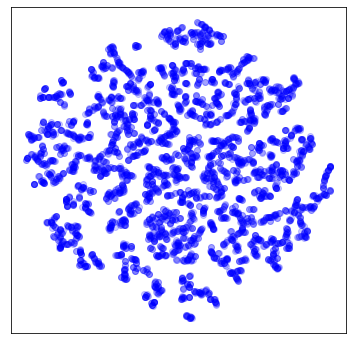

1
['0' '1' '0' ... '1' '0' '0']


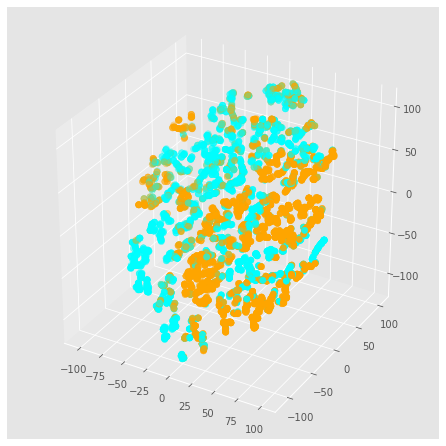

In [7]:
print("Visualizacion de los datos por el TSNE")
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = 'b', marker='o', alpha=0.2)
plt.xticks([])
plt.yticks([])
plt.show();


#----------------------------
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
colores=['cyan','orange','blue','yellow']
asignar=[]
print(y_price_cat[0])
y_pintar=y_price_cat[random_idx]
print(y_pintar)
for row in y_pintar.astype('int32'):
    asignar.append(colores[row])

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 1], c=asignar,s=40)
#ax.scatter(X_new[:, 1], X_new[:, 2], X_new[:, 0], c=asignar,s=20)

Visualizamos con las categorias seleccionadas para ver si tiene sentido o es mas claro. 

Visualizacion de los datos con las categorias seleccionadas


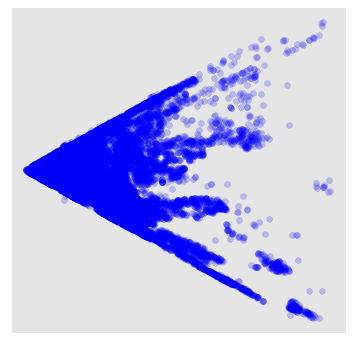

1
['1' '1' '1' ... '0' '1' '1']


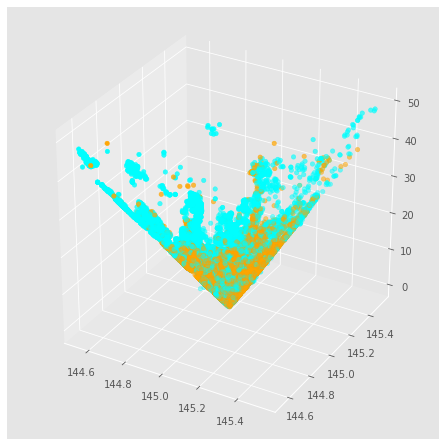

In [8]:
print("Visualizacion de los datos con las categorias seleccionadas")
plt.figure(figsize=(6, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c = 'b', marker='o', alpha=0.2)
plt.xticks([])
plt.yticks([])
plt.show();


#----------------------------
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
colores=['cyan','orange','blue','yellow']
asignar=[]
print(y_price_cat[0])
y_pintar=y_price_cat
print(y_pintar)
for row in y_pintar.astype('int32'):
    asignar.append(colores[row])

#ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=asignar,s=40)
ax.scatter(X_new[:, 1], X_new[:, 1], X_new[:, 0], c=asignar,s=20)

Parece que se ven mejor seleccionando las categorias que hemos seleccionado.En el cual, los datos mas caros estan abajo  naranjas y se difunden con los azules amedida que aumentamos al distancia al centro. 

Duda: las variables estan correlacionadas?? Poner ejemplos de otras varaibles??

## K-Means 

Usaremos este modelo por que es simple y util para dataset grandes además es una técnica escalable. 


La estrategia que usaremos para realizar K-Means es :

- Representar `inertia`  para determinar el mejor número de clusters.  
- Analizar el numero de muestras en cada uno de los clusters y la sumas de las distancias al centroide. 
- Para cada cluster, `display`  el ejemplo de $n$  mas cercano y el mas lejano  de cada centroide.
- Analyze the features distribution for each cluster.

La idea es pasarle el que procede TNSE y las 3 mejores columnas. Comenzamos con  las 3 mejores variables según nuesta seleccion anterior ya que los resultados del TNSE no eran muy especificos. 

Inertia acorde a las categorias selecionadas


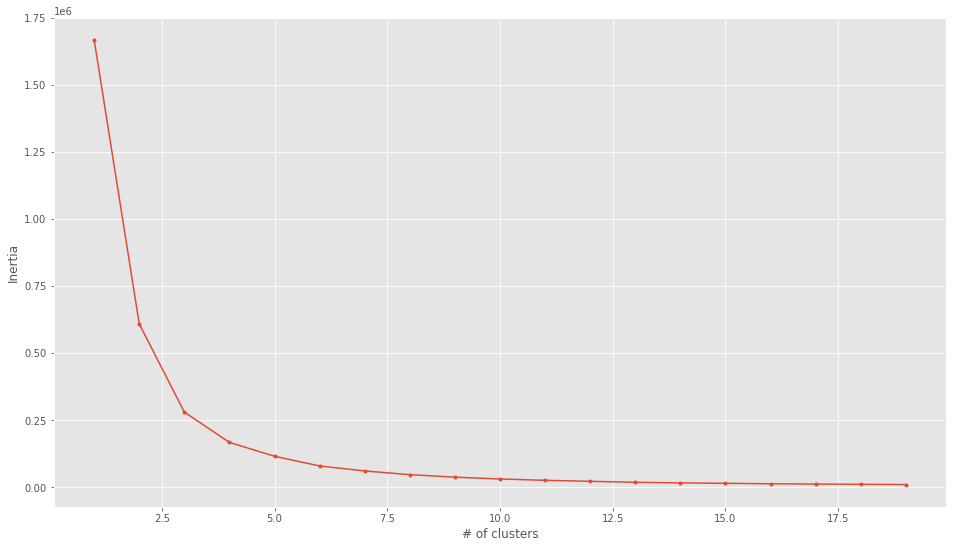

In [9]:
from sklearn.cluster import KMeans

K = range(1,20)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_new)
    inertia.append(kmeans.inertia_)
       
print("Inertia acorde a las categorias selecionadas")  

plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

La "inertia" corresponde a mas o menos 3 o 4 clusters. Comprobaremos que es mejor posteriormente. 
Realizamos el algoritmo de K Means, primero probamos con 4 cluster segun hemos visualizado. 

Cluster sizes k-means: [ 8884 11759  1540  4873]
Cluster distances k-means: [1672490.31, 2778670.18, 14105984.11, 3397020.5]


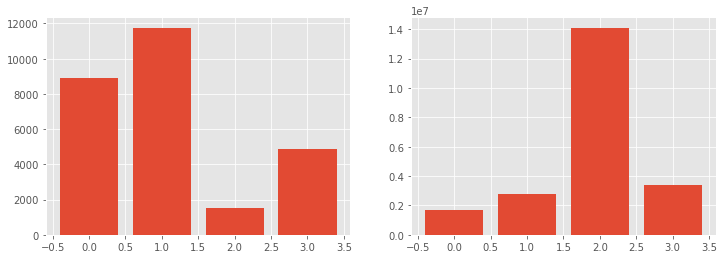

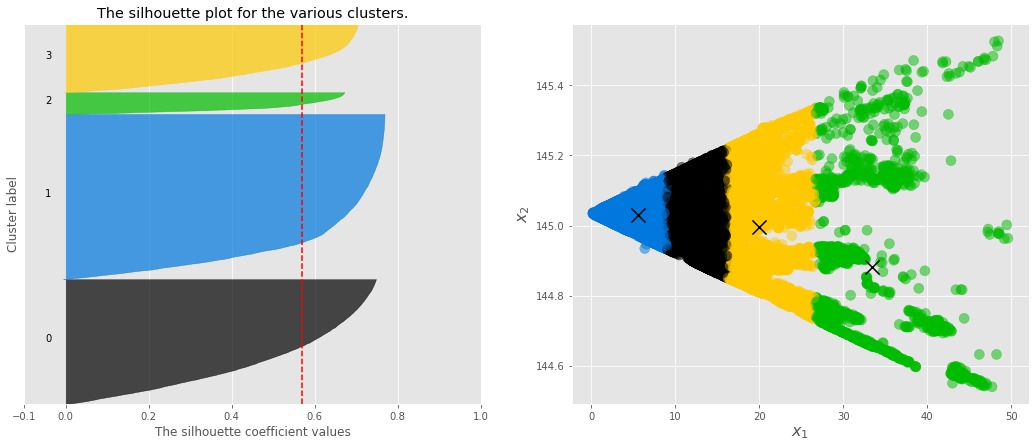

In [10]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=0)
labels_km = kmeans.fit_predict(X_new)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum( np.sum((X_new - c) ** 2, axis=1) ) 
    distances.append(d.round(2))
    
print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

plot_silhouette(X_new,k,kmeans.labels_,kmeans.cluster_centers_)





 
Parece que los clusters estan bastante descompensados, se puede observar en los diferentes tamaños y distancias, a pesar de que el coeficiende de silueta esta cerca de 0,6 por lo que los puntos de diferentes centroides estan bastante separados. 

Relizamos la misma prueba pero con 3 clusters para ver como se distribuyen. 

Cluster sizes k-means: [10017 14750  2289]
Cluster distances k-means: [2069676.44, 2485170.9, 11070221.75]


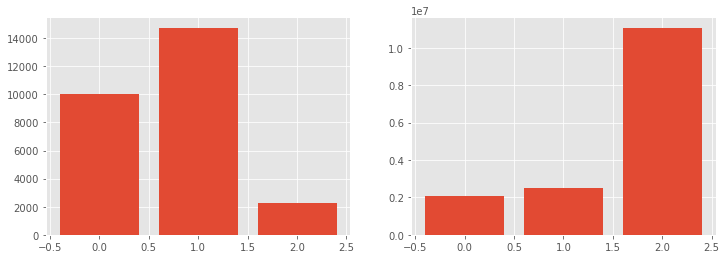

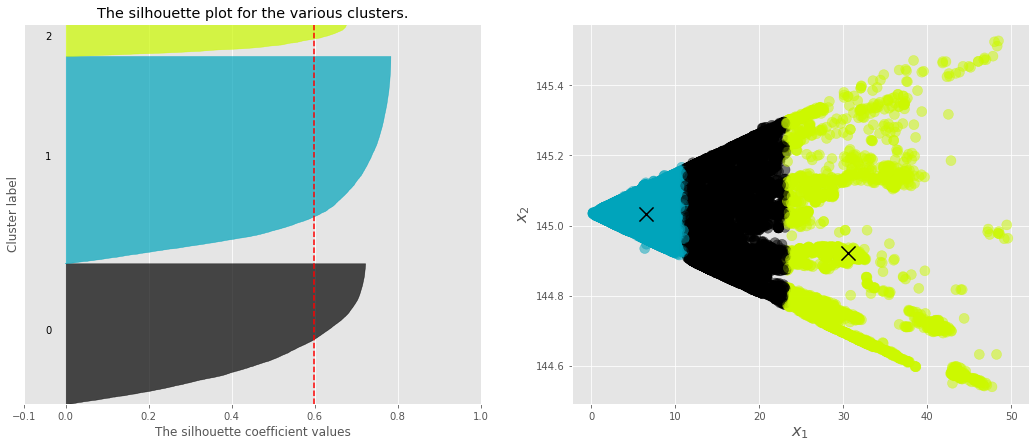

In [11]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=0)
labels_km = kmeans.fit_predict(X_new)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum( np.sum((X_new - c) ** 2, axis=1) ) 
    distances.append(d.round(2))
    
print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

plot_silhouette(X_new,k,kmeans.labels_,kmeans.cluster_centers_)


In [1]:
clusters= labels_km.cluster_centers_
print(clusters)


NameError: name 'labels_km' is not defined

 
Parece que los clusters estan bastante descompensados, se puede observar en los diferentes tamaños y distancias. Sin embargo, en el coeficiente de silueta vemos que todos soperan el 0.6 por lo que estan bastante separados unos cluster de otros aunque los tamaños no lo sean.

Podemos conlcuir que la separacion en 3 cluster es mas precisa ya que estan mejor separados entre si los datos de los diferentes clusters.

/home/inma/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

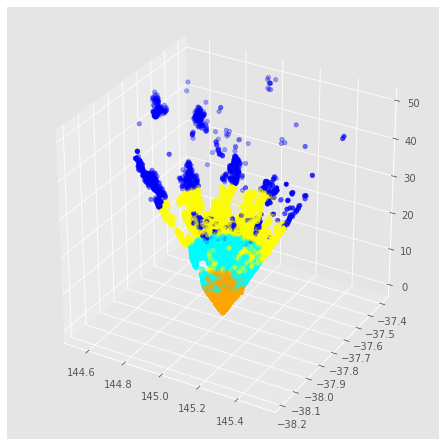

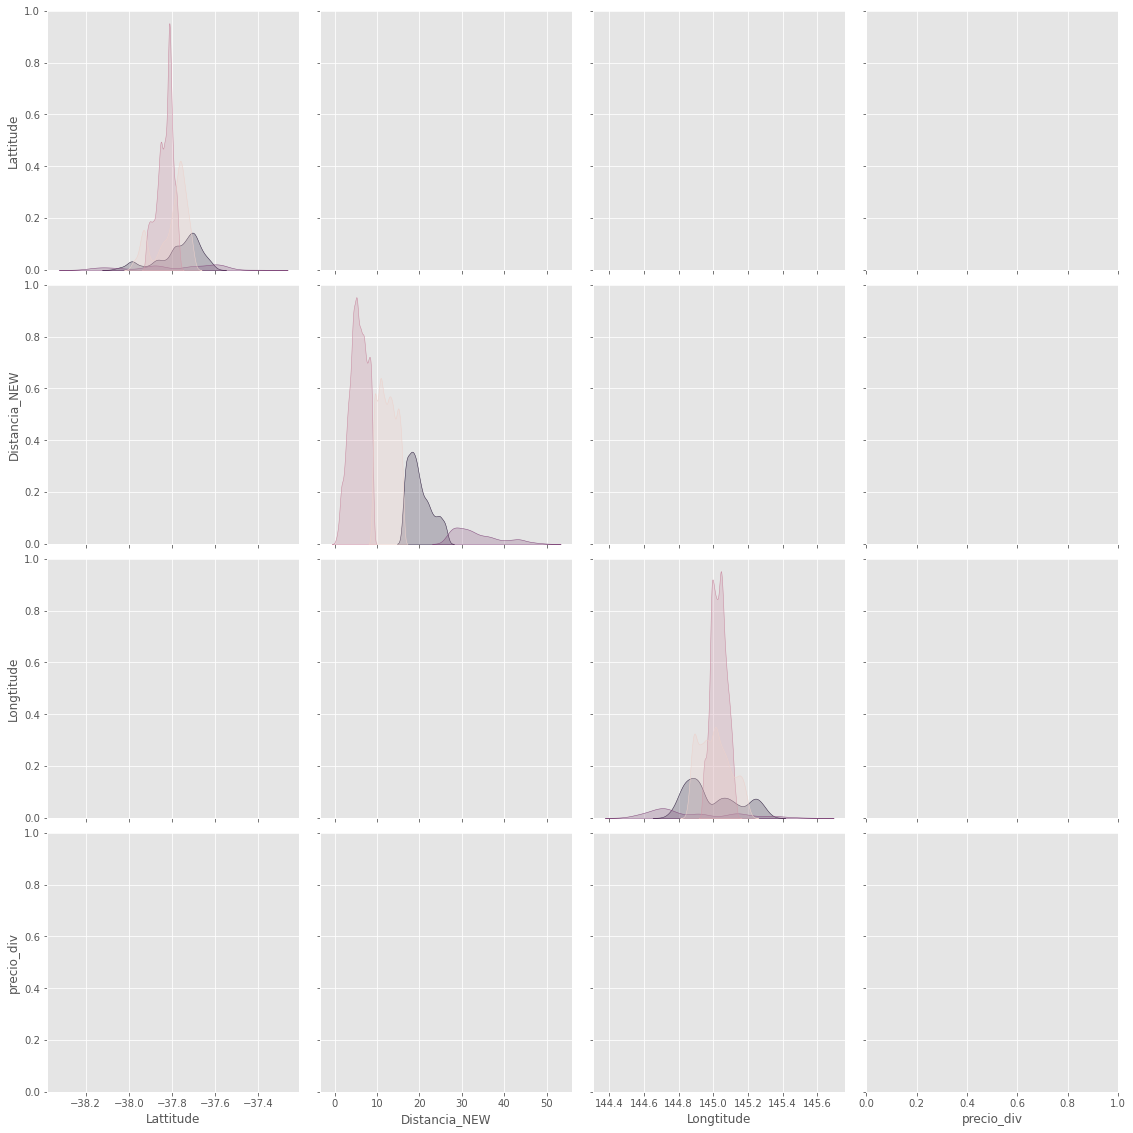

In [11]:
##Yo casi que quitaria esto 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

colores=['cyan','orange','blue','yellow']
asignarx=[]

for row in labels_km.astype('int32'):# asiga a cada row rn labels un color diferente  para cada uno de los clusters
    asignarx.append(colores[row])

ax.scatter(X_new[:, 1], X_new[:, 2], X_new[:, 0], c=asignarx,s=20)#AQUI parece que esta usadno el resutlado de Kmeans
data_RF['cluster']=labels_km



sb.pairplot(data_RF.dropna(), hue='cluster',size=4,vars=["Lattitude","Distancia_NEW","Longtitude","precio_div"],kind='scatter')

In [20]:
def close_to_far_from_center(X,centroid, n=10):
    
    distance = np.sum((X - centroid) ** 2, axis=1)
    
    print('Close to center')
    display(data_RF.iloc[np.argsort(distance)[:n]])
    
    print('Far from center')
    display(data_RF.iloc[np.argsort(distance)[-n:]])
    

In [30]:

from scipy import stats
print("Cluster 0")
close_to_far_from_center(X_new,kmeans.cluster_centers_[0])
#stats.describe(kmeans.cluster_centers_[1].sort())


Cluster 0
Close to center


,Rooms,Distance,Bathroom,Car,Landsize,Distancia_NEW,Longtitude,Lattitude,Price,precio_div,cluster
21585,3,13.1,1,3,639.0,15.811153,144.97480,-37.70830,910000,1,0
18434,3,13.1,1,2,681.0,15.813687,144.97966,-37.70697,706000,0,0
24657,3,13.1,2,2,689.0,15.822574,144.97687,-37.70762,750000,0,0
8750,3,12.4,1,4,592.0,15.785883,144.96640,-37.71110,640000,0,0
26156,3,12.0,1,2,587.0,15.819036,144.99782,-37.70309,730000,0,0
6610,3,11.2,1,2,945.0,15.821383,145.00010,-37.70270,779000,0,0
8775,4,12.4,1,2,0.0,15.777563,144.96820,-37.71060,752500,0,0
5924,3,9.9,1,2,590.0,15.782459,144.95070,-37.71700,683500,0,0
5979,3,9.9,2,1,122.0,15.797090,144.93730,-37.72310,600000,0,0
6430,2,11.2,1,2,950.0,15.790696,145.00710,-37.70200,810000,0,0


Far from center


,Rooms,Distance,Bathroom,Car,Landsize,Distancia_NEW,Longtitude,Lattitude,Price,precio_div,cluster
20214,3,45.9,2,4,40468.0,48.231807,144.63257,-37.54812,930000,1,2
17077,4,47.3,2,2,488.6,48.306749,145.51137,-38.05934,442000,0,2
23275,3,44.2,1,1,555.5,48.416964,144.97782,-37.40869,390000,0,2
16710,3,44.2,1,1,502.0,48.437659,144.97749,-37.40853,366000,0,2
11188,3,45.2,2,4,724.0,48.465570,145.52635,-37.64685,650000,0,2
25562,4,44.2,2,2,757.0,48.509563,144.98302,-37.40744,560000,0,2
20801,3,44.2,1,2,679.0,48.599281,144.97590,-37.40720,411000,0,2
27016,4,44.2,2,6,720.0,49.150316,144.96232,-37.40349,565000,0,2
23274,5,44.2,3,2,908.8,49.449786,145.00176,-37.39780,600000,0,2
23276,4,44.2,2,2,924.0,49.578383,144.96369,-37.39946,590000,0,2


In [31]:

print("Cluster 1")
close_to_far_from_center(X_new,kmeans.cluster_centers_[1])


Cluster 1
Close to center


,Rooms,Distance,Bathroom,Car,Landsize,Distancia_NEW,Longtitude,Lattitude,Price,precio_div,cluster
18042,4,5.9,2,3,620.0,0.174520,145.033760,-37.843910,3080000,1,1
4743,3,6.2,1,2,363.1,0.203503,145.033978,-37.842145,1706000,1,1
4742,2,6.2,2,2,0.0,0.210908,145.034300,-37.840700,1290000,1,1
4741,4,6.2,2,3,641.6,0.200678,145.035127,-37.844022,1815000,1,1
26725,4,5.9,4,3,630.0,0.201492,145.036430,-37.843820,2900000,1,1
26010,2,5.9,1,1,194.1,0.216733,145.035148,-37.843318,1310000,1,1
17021,2,5.9,1,2,275.4,0.216733,145.036874,-37.843399,820000,0,1
8168,2,4.6,1,1,0.0,0.324376,145.031300,-37.841600,690000,0,1
8120,3,4.6,1,0,1099.0,0.417594,145.030300,-37.843800,1635000,1,1
25014,2,4.1,1,1,251.4,0.486102,145.028589,-37.840413,700000,0,1


Far from center


,Rooms,Distance,Bathroom,Car,Landsize,Distancia_NEW,Longtitude,Lattitude,Price,precio_div,cluster
20477,5,47.3,2,2,756.0,46.705427,145.47282,-38.08086,490000,0,2
23816,4,47.3,2,1,799.0,46.806014,145.47790,-38.07652,571000,0,2
27016,4,44.2,2,6,720.0,49.150316,144.96232,-37.40349,565000,0,2
19136,3,47.3,2,2,648.0,46.981723,145.47262,-38.08547,493000,0,2
21664,4,45.2,2,2,23602.0,47.991145,145.52370,-37.65220,726000,0,2
23274,5,44.2,3,2,908.8,49.449786,145.00176,-37.39780,600000,0,2
23276,4,44.2,2,2,924.0,49.578383,144.96369,-37.39946,590000,0,2
11188,3,45.2,2,4,724.0,48.465570,145.52635,-37.64685,650000,0,2
14487,4,47.3,2,2,553.0,47.807215,145.48273,-38.08699,435000,0,2
17077,4,47.3,2,2,488.6,48.306749,145.51137,-38.05934,442000,0,2


In [32]:

print("Cluster 2")
close_to_far_from_center(X_new,kmeans.cluster_centers_[2])

Cluster 2
Close to center


,Rooms,Distance,Bathroom,Car,Landsize,Distancia_NEW,Longtitude,Lattitude,Price,precio_div,cluster
22834,4,20.6,2,2,399.0,30.552464,144.89019,-37.59240,640000,0,2
13616,4,18.0,2,2,724.0,30.574344,144.74850,-37.68690,660000,0,2
18496,4,18.0,2,4,643.0,30.574770,144.74576,-37.69011,707500,0,2
19447,3,20.6,2,2,469.5,30.552674,144.89716,-37.58993,560000,0,2
24580,4,20.6,2,2,544.0,30.636534,144.90095,-37.58783,750000,0,2
20097,3,20.6,2,2,469.4,30.564378,144.92587,-37.58113,600000,0,2
24043,4,20.6,2,2,595.0,30.647069,144.90553,-37.58624,695000,0,2
25797,3,20.6,2,2,448.0,30.636519,144.92127,-37.58168,590000,0,2
25083,4,20.6,2,2,584.0,30.615043,144.93654,-37.57800,613500,0,2
25275,4,20.6,2,2,512.0,30.523868,144.90065,-37.58903,662000,0,2


Far from center


,Rooms,Distance,Bathroom,Car,Landsize,Distancia_NEW,Longtitude,Lattitude,Price,precio_div,cluster
8155,4,4.6,2,2,516.0,0.485681,145.030500,-37.839800,2620000,1,1
8120,3,4.6,1,0,1099.0,0.417594,145.030300,-37.843800,1635000,1,1
8168,2,4.6,1,1,0.0,0.324376,145.031300,-37.841600,690000,0,1
26010,2,5.9,1,1,194.1,0.216733,145.035148,-37.843318,1310000,1,1
17021,2,5.9,1,2,275.4,0.216733,145.036874,-37.843399,820000,0,1
4742,2,6.2,2,2,0.0,0.210908,145.034300,-37.840700,1290000,1,1
4743,3,6.2,1,2,363.1,0.203503,145.033978,-37.842145,1706000,1,1
26725,4,5.9,4,3,630.0,0.201492,145.036430,-37.843820,2900000,1,1
4741,4,6.2,2,3,641.6,0.200678,145.035127,-37.844022,1815000,1,1
18042,4,5.9,2,3,620.0,0.174520,145.033760,-37.843910,3080000,1,1


A priori, no se puede observar una gran relación entre la categorización que hemos realizado anteriormente con el precio y los cluster seleccionados habría que estudiar mas en profundidad estas relaciones. 

In [27]:
#feature = 'Price'
#col_number = feature_names.index(feature)

#plt.figure(figsize=(15,10))
#for l in np.unique(labels_km):
    
    #plt.subplot(2,5,l+1)
    #plt.hist(X[labels_km == l,col_number],bins = 50, density=True)
    #plt.xlabel(feature)
    #plt.title('Cluster #' + str(l))

#plt.show()

## DBSCAN

Usamos otra tecnica de clustering mas compleja  para corroborar la infrormacion obtenida anteriormente. 

eps muy grande muy pocos clusters...


In [ ]:
#from sklearn.cluster import DBSCAN

#for eps in [1, 3]: # 5, 7]:# a quui a dejado solo el 1 y 3 
    #print("\neps={}".format(eps))
    #dbscan = DBSCAN(eps=eps, min_samples=20)
    #labels = dbscan.fit_predict(Xs)
    #print("Number of clusters: {}".format(len(np.unique(labels))))
    #print("Cluster sizes: {}".format(np.bincount(labels + 1)))

In [ ]:
#from sklearn.cluster import DBSCAN

#for eps in [1, 3]: 
    #print("\neps={}".format(eps))
    #dbscan = DBSCAN(eps=eps, min_samples=25)
   # labels = dbscan.fit_predict(Xs)
    #print("Number of clusters: {}".format(len(np.unique(labels))))
    #print("Cluster sizes: {}".format(np.bincount(labels + 1)))

## Hierarchical clustering

In [ ]:
#from scipy.cluster.hierarchy import dendrogram, linkage

#Z = linkage(X, 'average')
#dendrogram(Z)
#plt.show()